# LEAP DAY BIRTHDAY
**2024 Tidytuesday  Week 09**

##  Setup:

### Libraries

In [59]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go  

### Fonts and Params

### Data 

In [2]:
dfr = pd.read_csv("/Users/birusod/Documents/DataScienceDocs/GitProjects/Projects2024/RDocs/dsr/RDrafts/leap_day_births.csv");
dfr.head(3)

,year_birth,person,description,year_death,category,status,country,origin
0,1468,Pope Paul III,NaN,1549.0,Religion,Dead,Italy,Europe
1,1528,Albert V,Duke of Bavaria,1579.0,Politic,Dead,Germany,Europe
2,1528,Domingo Báñez,Spanish theologian,1604.0,Religion,Dead,Spain,Europe


## EDA

### By category

In [9]:
dfr['cat2']= np.where(
    dfr["category"] != "Art", 
    np.where(
        dfr["category"] != "Sport",  
        "Other",
        dfr["category"]),
    dfr["category"])
dfr.tail()

,year_birth,person,description,year_death,category,status,country,origin,cat2
116,1996,Reece Prescod,British sprinter,NaN,Sport,Alive,England,Europe,Sport
117,1996,Claudia Williams,New Zealand tennis player,NaN,Sport,Alive,New Zealand,Other,Sport
118,2000,Tyrese Haliburton,American basketball player,NaN,Sport,Alive,USA,America,Sport
119,2000,Ferran Torres,Spanish footballer,NaN,Sport,Alive,Spain,Europe,Sport
120,2004,Lydia Jacoby,American swimmer,NaN,Sport,Alive,USA,America,Sport


In [49]:
bycat1 = dfr.value_counts('cat2')
bycat2 = dfr.value_counts('cat2').reset_index()
bycat3 = dfr.value_counts('cat2').reset_index().sort_values('count')
bycat3

,cat2,count
2,Other,34
1,Sport,41
0,Art,46


### By Origin

In [202]:
by_origin1  = dfr.value_counts('origin')
by_origin2  = dfr.value_counts('origin').reset_index()
by_origin3  = dfr.value_counts('origin').reset_index().sort_values('count')
by_origin1

origin
America    58
Europe     47
Other      16
Name: count, dtype: int64

### By status

In [154]:
by_status1 = dfr.value_counts('status')
by_status2 = dfr.value_counts('status').reset_index()
by_status3 = dfr.value_counts('status').reset_index().sort_values('count')
by_status3

,status,count
1,Dead,56
0,Alive,65


## Viz

### By category

<Axes: title={'center': 'LEAP DAY\nDistribution By Category'}, xlabel='category'>

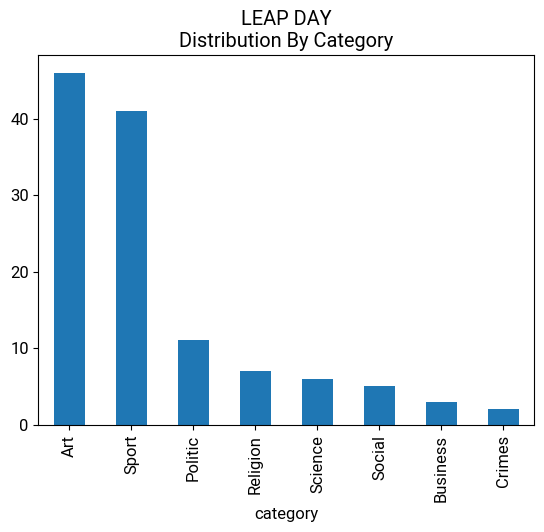

In [97]:
dfr.value_counts('category').plot(kind = 'bar', title="LEAP DAY\nDistribution By Category")

<Axes: title={'center': 'LEAP DAY\nDistribution By Category'}, ylabel='category'>

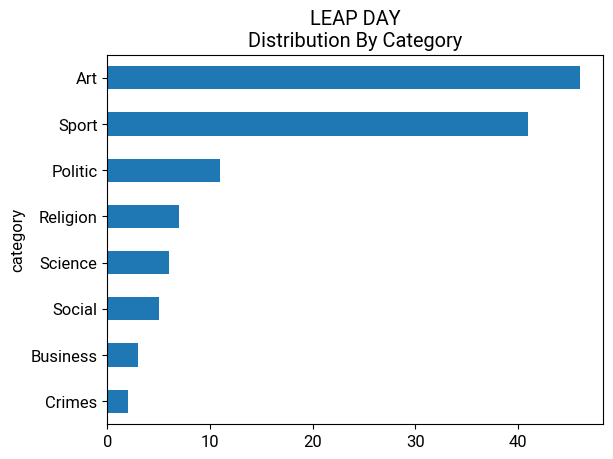

In [98]:
dfr.value_counts('category').sort_values().plot(kind = 'barh', title="LEAP DAY\nDistribution By Category")

In [197]:
fig = px.bar(x=bycat2['cat2'], y=bycat2['count'],  template= "plotly_dark",
             title="LEAP DAY: <br><sup>Distribution By Category</sup>",
             labels = {
                 'x':"", 
              'y':'Frequency'})
fig.update_traces(marker_color='orchid')
fig.update_layout(width=600, height=400, bargap=0.08)
fig.show()

In [105]:
fig = px.bar(
    bycat3, 'count', 'cat2', color = 'cat2',
    width=600, height=400,
    labels={ 
        'cat2': '', 
        'count': 'Frequency'},
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Category</i></sup>",)
fig.update_layout(
    titlefont=dict(size =20, color='darkblue', family='Roboto'))
fig.show()

### By Origin

<Axes: xlabel='origin'>

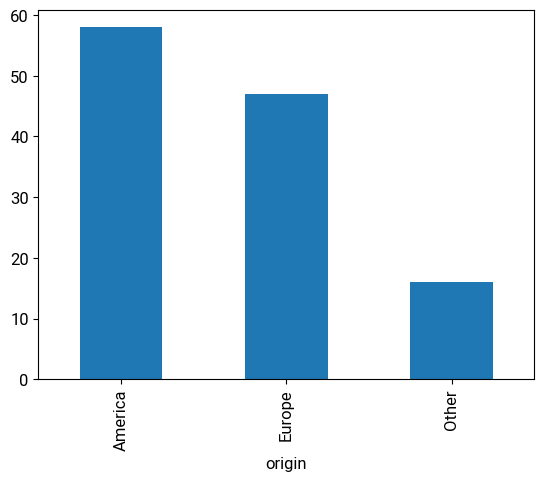

In [203]:
by_origin1.plot(kind = 'bar', title='')

<Axes: ylabel='origin'>

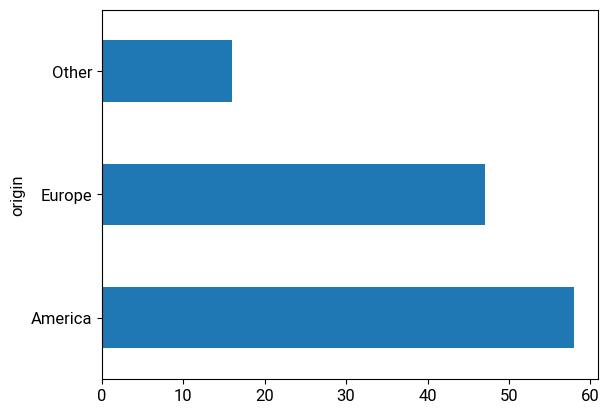

In [204]:
by_origin1.plot(kind = 'barh')

In [212]:

fig = px.bar(
    by_origin2, x = 'origin', y = 'count', 
    width = 500, height = 400,
    template = "ggplot2")
fig.show()

In [213]:

fig = px.bar(
    by_origin2, x = 'origin', y = 'count', 
    width = 500, height = 400,
    template = "plotly_white")
fig.show()

In [206]:
fig = go.Figure(
    go.Bar(
        x = by_origin2['origin'], y = by_orign2['count']
          )
)

fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Origin</i></sup>",
    titlefont=dict(color ='firebrick'))
fig.update_yaxes(tickfont_family="Arial Black")
fig.update_xaxes(tickfont_family="Arial Black")
fig.show()

In [207]:
fig = px.pie(
    by_origin2, 
    values='count',
    names='origin', color='origin',
    color_discrete_map={'America':'firebrick',   'Europe':'royalblue', 'Other':'grey'})

fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Origin</i></sup>",
    titlefont=dict(color ='firebrick'))
fig.update_traces(
    hoverinfo='label+percent', 
    textinfo='value+percent', 
    textfont_size=14, textfont_color='white',
    marker=dict(
        #colors=['gold', 'mediumturquoise', 'darkorange'], 
        line=dict(color='white', width=1)))
fig.show()

In [208]:

fig = go.Figure(
    data=[go.Pie(
        labels = by_origin2['origin'], 
        values = by_origin2['count']
        )
    ]
 )
fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Origin</i></sup>",
    titlefont=dict(color ='firebrick'))
fig.show()

### By Status

<Axes: xlabel='status'>

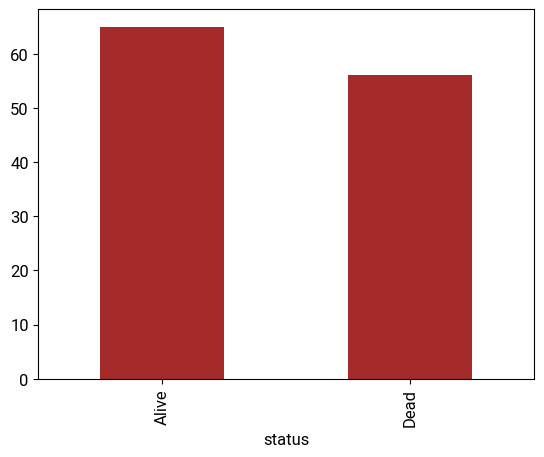

In [152]:
by_status1.plot.bar(color = 'brown')

In [174]:
fig = px.pie(
    by_status2, 
    values='count',
    names='status', color='status',
    color_discrete_map={'Alive':'forestgreen',   'Dead':'firebrick'})

fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Status</i></sup>",
    title_xanchor='center', title_x=.5,
    titlefont=dict(color ='navy'),
    legend=dict(
        x=0.5, y=0,
        orientation="h", 
        xanchor="center", yanchor="top"),
    legend_traceorder="reversed")

fig.update_traces(
    hoverinfo='label+percent', 
    textinfo='value+percent', 
    textfont_size=14, textfont_color='white',
    marker=dict(line=dict(color='white', width=1)))

fig.show()

In [178]:
fig = go.Figure(
    data=[go.Pie(
        labels = by_status2['status'], 
        values = by_status2['count']
        )
    ]
 )
fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Status</i></sup>",
    title_xanchor='center', title_x=.5,
    titlefont=dict(color ='navy'),
    legend=dict(
        x=0.5, y=0,
        orientation="h", 
        xanchor="center", yanchor="top"),
    legend_traceorder="reversed")

fig.update_traces(
    hoverinfo='label+percent', 
    textinfo='value+percent', 
    textfont_size=14, textfont_color='white',
    marker=dict(colors=['forestgreen', 'firebrick'], line=dict(color='#000000', width=2))
    )

fig.show()

In [191]:
fig = px.pie(
    by_status2, 
    values='count',
    names='status', color='status',
    color_discrete_map={'Alive':'forestgreen',   'Dead':'firebrick'})

fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Status</i></sup>",
    title_xanchor='center', title_x=.5,
    titlefont=dict(color ='navy'),
    legend=dict(
        x=0.5, y=0,
        orientation="h", 
        xanchor="center", yanchor="top"),
    legend_traceorder="reversed",
    annotations=[dict(
        text='VITAL<br>STATUS', 
        x=0.5, y=0.5, font_size=14, 
        showarrow=False,
        font_color = 'darkcyan'
        )])

fig.update_traces(
    hole=.4,
    hoverinfo='label+percent', 
    textinfo='value+percent', 
    textfont_size=14, textfont_color='white',
    marker=dict(line=dict(color='white', width=1)))

fig.show()

In [196]:
fig = go.Figure(
    data=[go.Pie(
        labels = by_status2['status'], 
        values = by_status2['count']
        )
    ]
 )
fig.update_layout(
    width=600, height=400,
    title="<b>LEAP DAY</b> <br><sup><i>Distribution By Status</i></sup>",
    title_xanchor='center', title_x=.5,
    titlefont=dict(color ='navy'),
    legend=dict(
        x=0.5, y=0,
        orientation="h", 
        xanchor="center", yanchor="top"),
    legend_traceorder="reversed")

fig.update_traces(
    hole=.4,
    hoverinfo='label+percent', 
    textinfo='value+percent', 
    textfont_size=14, textfont_color='white',
    marker=dict(colors=['forestgreen', 'firebrick'], line=dict(color='#000000', width=2))
    )

fig.show()